# **Decision Tree Model**

*Authors:*
- *Myroslava Sánchez Andrade A01730712*
- *Karen Rugerio Armenta A01733228*
- *José Antonio Bobadilla García A01734433*
- *Alejandro Castro Reus A01731065*

*Creation date: 15/10/2022*

*Last updated: 27/11/2022*

---

## **Importing data**

In [1]:
# RUN ONLY FOR GOOGLE COLAB

# from google.colab import drive

# drive.mount("path")  

# %cd "path"

In [1]:
# Importing the necessary libraries for the data analysis and transformations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from joblib import dump
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [2]:
smote = False

In [3]:
# Obtaining the train and test dataset

x_test = pd.read_csv('../../../../data/WA_Fn-UseC_-Telco-Customer-Churn/test/x_test.csv')
y_test = pd.read_csv('../../../../data/WA_Fn-UseC_-Telco-Customer-Churn/test/y_test.csv')

In [4]:
if smote:
    x_train = pd.read_csv('../../../../data/WA_Fn-UseC_-Telco-Customer-Churn/train/x_train.csv')
    y_train = pd.read_csv('../../../../data/WA_Fn-UseC_-Telco-Customer-Churn/train/y_train.csv')
else:    
    # Dividing the train dataset
    train = pd.read_csv('../../../../data/WA_Fn-UseC_-Telco-Customer-Churn/train/original_train.csv')
    x_train = train.drop(['Churn'], axis=1)
    y_train = pd.DataFrame(train['Churn'])

In [26]:
tree = DecisionTreeClassifier(random_state=0, criterion='gini', splitter='random', min_samples_split=50)

# fit the model with data
tree.fit(x_train, y_train)

y_logregpred = tree.predict(x_test)

In [27]:
print("Score:")
print(tree.score(x_test, y_test))

Score:
0.7798295454545454


In [28]:
#Creating a confusion matrix to help determinate accuracy wtih classification model
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

In [29]:
#Evaluataion of the predictions against the actual observations in y_val
cm = confusion_matrix(y_logregpred, y_test)

#Printing the accuracy
acc = round(accuracy(cm),2)
percentage = "{:.0%}".format(acc)
print(f"Accuracy of Model: {percentage}")

Accuracy of Model: 78%


In [30]:
# Confussion Matrix
pd.DataFrame(cm)

,0,1
0,1411,306
1,159,236


In [31]:
# K-Fold Cross-Validation
def cross_validation(model, _X, _y, _cv=3):
      _scoring = ['accuracy', 'precision', 'recall', 'f1']
      results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
      
      return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean()
              }


In [32]:
# Grouped Bar Chart for both training and validation data
def plot_result(x_label, y_label, plot_title, train_data, val_data):
        # Set size of plot
        plt.figure(figsize=(4,3))
        labels = ["1st Fold", "2nd Fold", "3rd Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.40000, 1)
        plt.bar(X_axis-0.2, train_data, 0.4, color='blue', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.4, color='red', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.savefig('../../joblibs/WA_Fn-UseC_-Telco-Customer-Churn/model/decission_tree/k_cross_plot.png')
        plt.show()

In [33]:
decision_tree_results = cross_validation(tree, x_train, y_train)
decision_tree_results

{'Training Accuracy scores': array([0.80894433, 0.80985701, 0.80504866]),
 'Mean Training Accuracy': 80.79500001357061,
 'Training Precision scores': array([0.69738863, 0.68265162, 0.68047337]),
 'Mean Training Precision': 0.6868378758854633,
 'Training Recall scores': array([0.51299435, 0.54751131, 0.51977401]),
 'Mean Training Recall': 0.5267598912663719,
 'Training F1 scores': array([0.59114583, 0.60765851, 0.58936579]),
 'Mean Training F1 Score': 0.5960567101521458,
 'Validation Accuracy scores': array([0.78467153, 0.76703163, 0.78575776]),
 'Mean Validation Accuracy': 77.91536410705991,
 'Validation Precision scores': array([0.63836478, 0.57853403, 0.63235294]),
 'Mean Validation Precision': 0.6164172508214323,
 'Validation Recall scores': array([0.45927602, 0.49887133, 0.48642534]),
 'Mean Validation Recall': 0.4815242297648353,
 'Validation F1 scores': array([0.53421053, 0.53575758, 0.54987212]),
 'Mean Validation F1 Score': 0.5399467416118379}

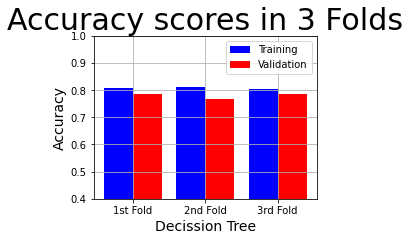

In [34]:
# Plot Accuracy Result
model_name = "Decission Tree"
plot_result(model_name,
            "Accuracy",
            "Accuracy scores in 3 Folds",
            decision_tree_results["Training Accuracy scores"],
            decision_tree_results["Validation Accuracy scores"])

In [35]:
# Calculatin the MSE and accuracy in the training and test

# Train
y_train_predict = tree.predict(x_train)
y_train_true = y_train
# MSE
mse_train = mean_squared_error(y_train_true, y_train_predict)
print(f'MSE Train: {mse_train}')
# Accuracy
acc_train = accuracy_score(y_train_true, y_train_predict, normalize=True)
print(f'Accuracy Train: {acc_train}')

# Test
y_test_predict = tree.predict(x_test)
y_test_true = y_test
# MSE
mse_test = mean_squared_error(y_test_true, y_test_predict)
print(f'MSE Test: {mse_test}')
# Accuracy
acc_test = accuracy_score(y_test_true, y_test_predict, normalize=True)
print(f'Accuracy Test: {acc_test}')


MSE Train: 0.1892111133644291
Accuracy Train: 0.8107888866355709
MSE Test: 0.22017045454545456
Accuracy Test: 0.7798295454545454


### **Exporting the model**
****

In [36]:
if smote:
    dump(tree, "../../joblibs/WA_Fn-UseC_-Telco-Customer-Churn/model/decission_tree/decision_tree_model_smote.joblib")
else:
    dump(tree, "../../joblibs/WA_Fn-UseC_-Telco-Customer-Churn/model/decission_tree/decision_tree_model.joblib")